<a href="https://colab.research.google.com/github/fro0m/financial-investments-model/blob/main/cash_flow_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color="blue">Install Packages</font>

In [ ]:
!pip install numpy_financial numpy matplotlib

## <font color="blue">Import Libraries</font>

In [ ]:
import plotly.graph_objects as go
import plotly.figure_factory as ff
import pandas as pd
import numpy as np

## <font color="blue">Data</font>

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/analyticsariel/public-data/main/cash_flow_data.csv')
df.head()

,property_address,rent,additional_income,principal_and_interest,taxes,insurance,property_management,cap_ex,vacancy,utilities,additional_expenses
0,"123 Main St, Tampa, FL 33603",2600,50,1159,528,80,234,130,208,50,75


In [ ]:
# assign variables to values in table
property_address = df['property_address'].iloc[0]
rent = df['rent'].iloc[0]
additional_income = df['additional_income'].iloc[0]
principal_and_interest = df['principal_and_interest'].iloc[0]
taxes = df['taxes'].iloc[0]
insurance = df['insurance'].iloc[0]
property_management = df['property_management'].iloc[0]
cap_ex = df['cap_ex'].iloc[0]
vacancy = df['vacancy'].iloc[0]
utilities = df['utilities'].iloc[0]
additional_expenses = df['additional_expenses'].iloc[0]

# summary variables
total_income = rent + additional_income
fixed_expense = principal_and_interest + taxes + insurance
variable_expense = property_management + cap_ex + vacancy + utilities + additional_expenses
total_expense = fixed_expense + variable_expense

## <font color="blue">Transform</font>

In [ ]:
# create list of labels for the chart
label_list = [ "Income",
               "Rent",
               "Additional Income",
               "Expense",
               "Fixed",
               "Variable",
               "Principal & Interest",
               "Taxes",
               "Insurance",
               "Property Management",
               "CapEx",
               "Vacancy",
               "Utilities",
               "Additional Expenses",
               ]
# append an index number to each element in the list
label_dict = {}
for i in range(len(label_list)):
  label_dict[label_list[i]] = i
label_dict

{'Income': 0,
 'Rent': 1,
 'Additional Income': 2,
 'Expense': 3,
 'Fixed': 4,
 'Variable': 5,
 'Principal & Interest': 6,
 'Taxes': 7,
 'Insurance': 8,
 'Property Management': 9,
 'CapEx': 10,
 'Vacancy': 11,
 'Utilities': 12,
 'Additional Expenses': 13}

In [ ]:
# create sub list for each node -> target -> value
sankey_list = [
  # income
  ["Income", "Rent", rent],
  ["Income", "Additional Income", additional_income],
  # expenses [fixed]
  ["Expense", "Fixed", fixed_expense],
  ["Fixed", "Principal & Interest", principal_and_interest],
  ["Fixed", "Taxes", taxes],
  ["Fixed", "Insurance", insurance],
  # expenses [variable]
  ["Expense", "Variable", variable_expense],
  ["Variable", "Property Management", property_management],
  ["Variable", "CapEx", cap_ex],
  ["Variable", "Vacancy", vacancy],
  ["Variable", "Utilities", utilities],
  ["Variable", "Additional Expenses", additional_expenses],
]

In [ ]:
# create sublists from the sankey list
source_list = [label_dict[x[0]] for x in sankey_list]
target_list = [label_dict[x[1]] for x in sankey_list]
value_list = [x[2] for x in sankey_list]

print('Source list:', source_list)
print('Target list:', target_list)
print('Value list:', value_list)

Source list: [0, 0, 3, 4, 4, 4, 3, 5, 5, 5, 5, 5]
Target list: [1, 2, 4, 6, 7, 8, 5, 9, 10, 11, 12, 13]
Value list: [2600, 50, 1767, 1159, 528, 80, 697, 234, 130, 208, 50, 75]


## <font color="blue">Visualization</font>

In [ ]:
fig = go.Figure(go.Indicator(
    mode = "number+delta",
    value = total_income - total_expense,
    number = {'prefix': "Cash Flow - $"},
    domain = {'x': [0, 1], 'y': [0, 1]})
)

fig.update_layout(height=300)

fig.show()

In [ ]:
# create figure
fig = go.Figure(data=[go.Sankey(
    # nodes
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = label_list, # cash flow parameters
      hovertemplate='%{label} has total value $%{value}',
    ),
    # links
    link = dict(
      source = source_list, # start node
      target = target_list, # end node
      value = value_list # value of end node
  ))])

fig.update_layout(
    hovermode = 'x',
    title="Income & Expenses<br>Property Address: {}".format(property_address),
    # optional for black background
    font=dict(size = 10, color = 'white'),
    plot_bgcolor='black',
    paper_bgcolor='black'
)

fig.show()

*italicized text*# End Notebook

In [ ]:
import numpy as np

def calculate_future_value(principal, monthly_contribution, annual_return, annual_inflation, years):
    months = years * 12
    monthly_return = (1 + annual_return) ** (1/12) - 1
    monthly_inflation = (1 + annual_inflation) ** (1/12) - 1

    values = [principal]
    current_value = principal

    for _ in range(months):
        current_value = (current_value + monthly_contribution) * (1 + monthly_return)
        real_value = current_value / (1 + monthly_inflation)
        values.append(real_value)

    return np.array(values)

# Example usage
principal = 10000
monthly_contribution = 500
annual_return = 0.05
annual_inflation = 0.15
years = 10

future_values = calculate_future_value(principal, monthly_contribution, annual_return, annual_inflation, years)

print(future_values)

[ 10000.          10491.86356051  11050.79863297  11612.89400558
  12178.16754716  12746.63722752  13318.32111811  13893.23739253
  14471.40432715  15052.84030167  15637.56379973  16225.59340946
  16816.9478241   17411.64584257  18009.7063701   18611.1484188
  19215.99110828  19824.25366627  20435.9554292   21051.11584283
  21669.75446287  22291.89095561  22917.54509854  23546.73678095
  24179.48600461  24815.81288437  25455.73764882  26099.28064094
  26746.46231869  27397.30325574  28051.82414207  28710.04578465
  29371.98910809  30037.67515533  30707.12508826  31380.36018844
  32057.40185775  32738.2716191   33422.99111706  34111.58211862
  34804.06651382  35500.46631646  36200.80366483  36905.1008224
  37613.38017848  38325.66424902  39041.97567726  39762.33723445
  40486.77182062  41215.30246526  41947.95232808  42684.74469975
  43425.70300261  44170.85079143  44920.21175419  45673.80971279
  46431.6686238   47193.81257928  47960.26580749  48731.05267368
  49506.19768088  50285.725

In [ ]:
import numpy_financial as np

monthly_payment = np.ppmt(0.085/12, 1, 12*12, 100000)

print(f"The monthly payment is: ${monthly_payment:.2f}")

The monthly payment is: $-401.72


Hhhh

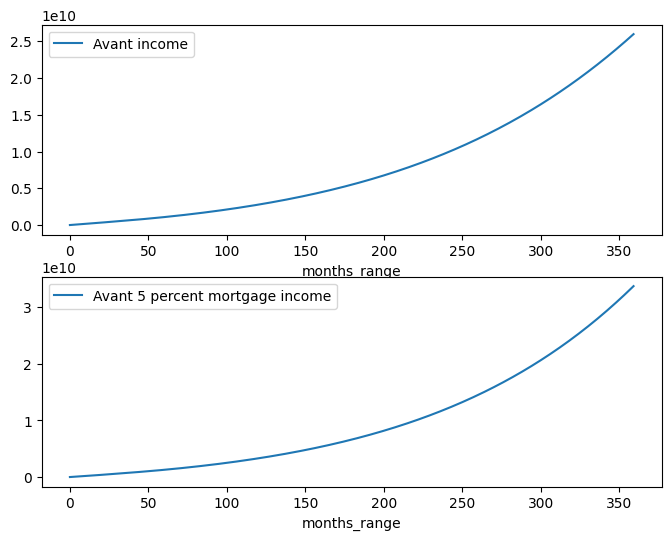

In [ ]:
from dataclasses import dataclass
from datetime import datetime, date, timedelta
import pandas as pd
from typing import Any, Dict
from dateutil.relativedelta import relativedelta
from math import floor
import numpy as np


number_of_months = 30*12
average_days_in_month = 30.436875
cumulative_inflation_rate: np.array = np.cumprod(np.full(number_of_months, 1 + 0.09/12)) # let's say that yearly inflation is 9%
cumulative_realty_price_change_monthly_rate: np.array = np.cumprod(np.full(number_of_months, 1 + 0.1/12)) # https://www.perplexity.ai/search/srednii-rost-tseny-zhiloi-nedv-5xtf_BFOTbeLgEYBmmSPKg
cumulative_realty_rent_change_monthly_rate: np.array = np.cumprod(np.full(number_of_months, 1 + 0.04/12)) # https://www.perplexity.ai/search/srednii-rost-tseny-arendy-zhil-lhvgH9HnTGmuhlsJHdI6xg
cumulative_cash_conservative_investment_rate: np.array = np.cumprod(np.full(number_of_months, 1 + 0.01)) # basic rate of investment cash to a bank deposit or goverment bonds. This is used to adjust costs as they would be invested in the conservative tools

@dataclass
class AssetBase:
  name: str
  # instant costs means a money amount you need to invest at certain dates
  # it returns a instant costs by end of by_month_end_index
  def instant_costs(self, by_month_end_index=0) -> int:
    pass

  def monthly_costs(self, by_month_end_index=0) -> int :
    pass

  # instant income means money a amount you will get at certain dates
  # it returns a instant income by end of by_month_end_index
  def instant_income(self, by_month_end_index=0) -> int :
    pass

  def monthly_income(self, by_month_end_index=0) -> int :
    pass

  # def name() -> str:
  #   pass


@dataclass
class RealtyObject(AssetBase):
  # name: str

  # instant expences
  instant_price_rur: int # how much of personal money is going to be invested
  instant_price_renovation_rur: int # how much of personal money is going to be invested

  # mothly expences
  renovation_principal_and_interest_rur: int
  realty_principal_and_interest_rur: int # mortgage payment
  cap_ex_rur: int
  taxes_percentage: float
  property_management_rur: int
  insurance_rur: int
  additional_monthly_expenses_rur: int
  utilities_rur: int # Costs incurred by using utilities such as electricity, water, waste disposal, heating, and sewage


  # timings
  date_of_getting_keys: date
  renovation_time_months: int

  # instant income
  realty_object_price_rub: int

  # monthly income
  expected_monthly_rent_rur: int
  additional_income_rur: int
  vacancy_percentage: float

  # external market data
  cumulative_inflation_rate: np.array
  cumulative_realty_price_change_monthly_rate: np.array
  cumulative_realty_rent_change_monthly_rate: np.array
  cumulative_cash_conservative_investment_rate: np.array


  def date_ready_to_get_income(self) -> date:
    return self.date_of_getting_keys + relativedelta(months_range=self.renovation_time_months)

  def instant_costs(self, by_month_end_index=0) -> int:
    months_to_renovation_start = floor((self.date_of_getting_keys - date.today()).days / average_days_in_month)
    if months_to_renovation_start < 0: # means that object already ready to use as current date is after date of building the realty
      instant_costs = (self.instant_price_rur + self.instant_price_renovation_rur) * self.cumulative_cash_conservative_investment_rate[by_month_end_index]
    elif by_month_end_index > months_to_renovation_start:
      instant_costs = self.instant_price_rur * self.cumulative_cash_conservative_investment_rate[by_month_end_index] + self.instant_price_renovation_rur * (self.cumulative_cash_conservative_investment_rate[by_month_end_index] / self.cumulative_cash_conservative_investment_rate[by_month_end_index - months_to_renovation_start])
    elif by_month_end_index >= 0 and by_month_end_index <= months_to_renovation_start:
      instant_costs =  self.instant_price_rur * self.cumulative_realty_price_change_monthly_rate[by_month_end_index] * self.cumulative_cash_conservative_investment_rate[by_month_end_index]
    else:
      raise Exception("Logic error occurred")  # logic error
    return instant_costs

  def monthly_costs(self, by_month_end_index=0) -> int :
    return (self.renovation_principal_and_interest_rur + \
    self.realty_principal_and_interest_rur + (self.cap_ex_rur + \
    self.taxes_percentage * self.monthly_income() + \
    self.property_management_rur + self.insurance_rur + \
    self.additional_monthly_expenses_rur + self.utilities_rur)*self.cumulative_inflation_rate[by_month_end_index]) * self.cumulative_cash_conservative_investment_rate[by_month_end_index]

  def instant_income(self, by_month_end_index=0) -> int :
    return self.realty_object_price_rub * self.cumulative_realty_price_change_monthly_rate[by_month_end_index]

  def monthly_income(self, by_month_end_index=0) -> int :
    return (self.expected_monthly_rent_rur + self.additional_income_rur)*self.vacancy_percentage * self.cumulative_realty_rent_change_monthly_rate[by_month_end_index]


avant_appartment_fifth_percent_mortgage = RealtyObject(name = 'Avant 5 percent mortgage',  instant_price_rur=4000000, instant_price_renovation_rur=2500000, renovation_principal_and_interest_rur=0, realty_principal_and_interest_rur=71796, cap_ex_rur=5000, taxes_percentage=0.07, property_management_rur=20000, insurance_rur=0, additional_monthly_expenses_rur=0, utilities_rur=0, date_of_getting_keys=date(2027, 6, 1),  renovation_time_months=3, realty_object_price_rub=22000000, expected_monthly_rent_rur=120000, additional_income_rur=0,vacancy_percentage=0.9, cumulative_inflation_rate=cumulative_inflation_rate, cumulative_realty_price_change_monthly_rate=cumulative_realty_price_change_monthly_rate, cumulative_realty_rent_change_monthly_rate=cumulative_realty_rent_change_monthly_rate,cumulative_cash_conservative_investment_rate=cumulative_cash_conservative_investment_rate)

avant_appartment = RealtyObject(name = 'Avant',  instant_price_rur=6000000, instant_price_renovation_rur=2500000, renovation_principal_and_interest_rur=0, realty_principal_and_interest_rur=254222, cap_ex_rur=5000, taxes_percentage=0.07, property_management_rur=20000, insurance_rur=0, additional_monthly_expenses_rur=0, utilities_rur=0, date_of_getting_keys=date(2027, 6, 1),  renovation_time_months=3, realty_object_price_rub=22000000, expected_monthly_rent_rur=120000, additional_income_rur=0,vacancy_percentage=0.9, cumulative_inflation_rate=cumulative_inflation_rate, cumulative_realty_price_change_monthly_rate=cumulative_realty_price_change_monthly_rate, cumulative_realty_rent_change_monthly_rate=cumulative_realty_rent_change_monthly_rate, cumulative_cash_conservative_investment_rate=cumulative_cash_conservative_investment_rate)

def calculate_income(asset: AssetBase):
  months_range = range(number_of_months) # 30 years
  income_from_asset_rub = list()
  last_income_from_asset_rub = 0
  for current_month_index in months_range:
    last_income_from_asset_rub = last_income_from_asset_rub + asset.instant_income(current_month_index) + asset.monthly_income(current_month_index) -  asset.instant_costs(current_month_index) - asset.monthly_costs(current_month_index)
    income_from_asset_rub.append(last_income_from_asset_rub)
  return {'months_range': months_range, f'{asset.name} income': income_from_asset_rub}

import matplotlib.pyplot as plt

# Create a sample DataFrame
avant_df = pd.DataFrame.from_dict(calculate_income(avant_appartment))
avant_appartment_fifth_percent_mortgage_df = pd.DataFrame.from_dict(calculate_income(avant_appartment_fifth_percent_mortgage))

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))  # 2 rows, 1 column

# Plot a bar graph
avant_df.plot(ax=axes[0], x="months_range", y="Avant income", kind="line")
avant_appartment_fifth_percent_mortgage_df.plot(ax=axes[1], x="months_range", y="Avant 5 percent mortgage income", kind="line")

plt.show()



# Plotting